In [1]:
import pandas as pd

df = pd.read_csv('three_col.csv')
df.head()

,income,age,days_since_purchase
0,56432,31,492
1,137580,38,551
2,68285,59,304
3,93617,51,507
4,113441,54,509


In [2]:
cols = df.columns
zcols = []
for col in cols:
    df['z_' + col] = (df[col] - df[col].mean())/df[col].std()
    zcols.append('z_' + col)

In [3]:
df.head()

,income,age,days_since_purchase,z_income,z_age,z_days_since_purchase
0,56432,31,492,-0.606833,-0.748848,0.818321
1,137580,38,551,1.505879,-0.135469,1.349109
2,68285,59,304,-0.298237,1.704668,-0.873001
3,93617,51,507,0.361289,1.003663,0.953267
4,113441,54,509,0.877413,1.266540,0.971260


In [4]:
cols = df.columns
zcols = []
for col in cols:
    df['z_' + col] = (df[col] - df[col].mean())/df[col].std()
    zcols.append('z_' + col)

In [8]:
df[zcols].head()

,z_income,z_age,z_days_since_purchase
0,-0.606833,-0.748848,0.818321
1,1.505879,-0.135469,1.349109
2,-0.298237,1.704668,-0.873001
3,0.361289,1.003663,0.953267
4,0.877413,1.266540,0.971260


## K Means Clustering on Standardization variable of Income and Age

In [9]:
from sklearn import cluster

model = cluster.KMeans(n_clusters=4, random_state=10)
df['cluster'] = model.fit_predict(df[zcols])

Matrix decomposition is about the factorization of a matrix into a product of matrices. It breaks down a matrix into constituent parts to make certain operations on the matrix easier to perform.

In [11]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
df['pc1'], df['pc2'] = zip(*pca.fit_transform(df[zcols]))

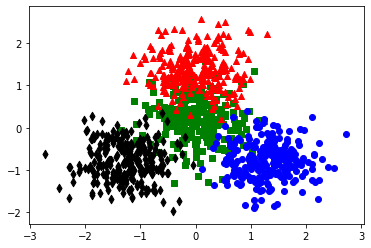

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

colors = ['r', 'b', 'k', 'g']
markers = ['^', 'o', 'd', 's']

for c in df['cluster'].unique():
    d = df[df['cluster'] == c]
    plt.scatter(d['pc1'], d['pc2'], marker=markers[c], color=colors[c])

plt.show()

In [8]:
for cluster in df['cluster'].unique():
    print("Cluster: " + str(cluster))
    for col in ['income', 'age', 'days_since_purchase']:
        print(col + ": {:.2f}".format(df.loc[df['cluster'] == cluster, col].mean()))

Cluster: 1
income: 46153.20
age: 29.34
days_since_purchase: 498.19
Cluster: 3
income: 113118.22
age: 49.77
days_since_purchase: 502.58
Cluster: 2
income: 45002.10
age: 49.49
days_since_purchase: 299.66
Cluster: 0
income: 114704.12
age: 29.34
days_since_purchase: 302.92
